# Importing libraries and loading data

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [209]:
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR trust,17-04-2019 00:00,2019,1929094181,06-04-2019,20190405,20190406,20190421,USD,RV,1,NaN,542.11,20190406,NAH4,1.929094e+09,0
1,U001,200769623,WAL-MAR us,21-03-2019 00:00,2019,1928902006,05-03-2019,20190305,20190305,20190320,USD,RV,1,NaN,1237.54,20190305,NAH4,1.928902e+09,0
2,U001,200772670,ASSOCIAT corporation,29-11-2019 00:00,2019,1930146369,15-11-2019,20191113,20191115,20191130,USD,RV,1,NaN,443.52,20191115,NAU5,1.930146e+09,0
3,U001,200705742,DOT trust,NaN,2020,1930704656,26-03-2020,20200326,20200326,20200427,USD,RV,1,NaN,33027.15,20200326,NA32,1.930705e+09,1
4,U001,200772670,ASSOCIAT foundation,NaN,2020,1930777845,11-04-2020,20200411,20200411,20200426,USD,RV,1,NaN,18351.01,20200411,NAU5,1.930778e+09,1


# Splitting Data into test and train

In [210]:
df.duplicated().sum() #1170 identical rows

# removing duplicate rows- this is done to prevent overfitting of the model
df.drop_duplicates(keep='first',inplace=True)
df.shape

(48830, 19)

In [211]:
#removing duplicate columns if any 
newdf=df.T
newdf.drop_duplicates(keep='first',inplace=True)
df=newdf.T
df.shape

(48830, 19)

In [212]:
#splitting of data
main_train = df[df['clear_date'].notnull()]
test = df[df['clear_date'].isnull()]

# Data Preprocessing

In [213]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR trust,17-04-2019 00:00,2019,1929094181,06-04-2019,20190405,20190406,20190421,USD,RV,1,NaN,542.11,20190406,NAH4,1929094181.0,0
1,U001,200769623,WAL-MAR us,21-03-2019 00:00,2019,1928902006,05-03-2019,20190305,20190305,20190320,USD,RV,1,NaN,1237.54,20190305,NAH4,1928902006.0,0
2,U001,200772670,ASSOCIAT corporation,29-11-2019 00:00,2019,1930146369,15-11-2019,20191113,20191115,20191130,USD,RV,1,NaN,443.52,20191115,NAU5,1930146369.0,0
5,U001,200769623,WAL-MAR trust,15-04-2019 00:00,2019,1929060985,03-04-2019,20190331,20190403,20190418,USD,RV,1,NaN,66799.51,20190403,NAH4,1929060985.0,0
6,U001,200759878,SA corporation,18-06-2019 00:00,2019,1929407894,01-06-2019,20190531,20190601,20190616,USD,RV,1,NaN,6936.71,20190601,NAH4,1929407894.0,0


## Data Cleaning - finding missing values,duplicate columns

### finding missing values


In [214]:
#finding missing values
main_train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             39120
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

<AxesSubplot:>

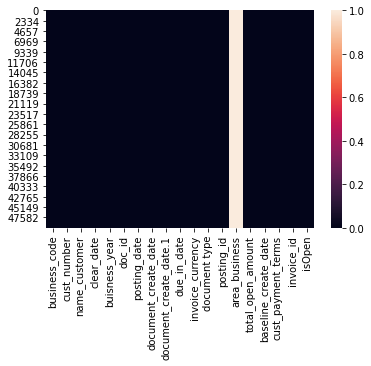

In [215]:
#'area_business' is completly missing as you can see from the main_train.shape
#to get a better view using heatmap to see the null values
sns.heatmap(main_train.isnull())

In [216]:
#since 'area_business' is completly null,it is of no use thus dropping it
main_train.drop(['area_business'], axis = 1,inplace=True)
main_train.shape

(39120, 18)

In [217]:
#since 'invoice_id' is derived from 'doc_id', we can remove 'invoice_id' 
main_train.drop(['invoice_id'], axis = 1,inplace=True)
main_train.shape

(39120, 17)

### converting into numerical values so that it can be useful to our model

In [218]:
main_train.dtypes

business_code             object
cust_number               object
name_customer             object
clear_date                object
buisness_year             object
doc_id                    object
posting_date              object
document_create_date      object
document_create_date.1    object
due_in_date               object
invoice_currency          object
document type             object
posting_id                object
total_open_amount         object
baseline_create_date      object
cust_payment_terms        object
isOpen                    object
dtype: object

In [219]:
#conversion to date_time

main_train.clear_date = pd.to_datetime(main_train['clear_date'])
main_train['document_create_date.1'] = pd.to_datetime(main_train['document_create_date.1'],format='%Y%m%d')
main_train.due_in_date = pd.to_datetime(main_train['due_in_date'],format='%Y%m%d')
main_train['posting_date'] = pd.to_datetime(main_train['posting_date'])

main_train['document_create_date']=pd.to_datetime(main_train['document_create_date'], format='%Y%m%d')

main_train['due_in_date']=pd.to_datetime(main_train.due_in_date,format='%Y%m%d')
main_train['baseline_create_date']=pd.to_datetime(main_train.baseline_create_date,format='%Y%m%d')




In [220]:
main_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                        object
total_open_amount                 object
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                            object
dtype: object

In [221]:
main_train.nunique(),main_train.dtypes

(business_code                 6
 cust_number                1032
 name_customer              3865
 clear_date                  399
 buisness_year                 2
 doc_id                    39120
 posting_date                422
 document_create_date        425
 document_create_date.1      422
 due_in_date                 495
 invoice_currency              2
 document type                 2
 posting_id                    1
 total_open_amount         35475
 baseline_create_date        434
 cust_payment_terms           71
 isOpen                        1
 dtype: int64,
 business_code                     object
 cust_number                       object
 name_customer                     object
 clear_date                datetime64[ns]
 buisness_year                     object
 doc_id                            object
 posting_date              datetime64[ns]
 document_create_date      datetime64[ns]
 document_create_date.1    datetime64[ns]
 due_in_date               datetime64[ns]
 inv

In [222]:
#converting to numerics

main_train['buisness_year'] = main_train['buisness_year'].astype(int)
# main_train['doc_id'] = main_train['doc_id'].astype(int)
main_train['posting_id'] = main_train['posting_id'].astype(int)
main_train['total_open_amount'] = main_train['total_open_amount'].astype(float)
main_train['isOpen'] = main_train['isOpen'].astype(int)

In [223]:
# since some names come only 1 time, we are grouping them together as 'Other' so that our model can gain better information
#since we can write all the names to the list for grouping so we are storing them as Series,
#we will then convert this series' index(which is the name of the company) to a list which we can pass in is.in()
s = pd.Series(main_train['name_customer'].value_counts(),name='vals')
s =s.to_frame()

In [224]:
s.vals,main_train.shape

(WAL-MAR               914
 WAL-MAR corp          902
 WAL-MAR trust         901
 WAL-MAR us            884
 WAL-MAR associates    871
                      ... 
 CHAMPIO                 1
 JACQ us                 1
 PRIM co                 1
 MORTON corp             1
 PRES corp               1
 Name: vals, Length: 3865, dtype: int64,
 (39120, 17))

In [225]:
l = list(s[s.vals==1].index.values)
main_train['name_customer'] = np.where(main_train['name_customer'].isin(l),"Other",main_train['name_customer'])
len(l)

1672

In [226]:
#making sure
'Other' in main_train['name_customer'].unique(),main_train.shape

(True, (39120, 17))

### Creating our target column - 'Delay'

In [227]:
main_train['delay'] = (main_train.clear_date-main_train.due_in_date).dt.days
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200769623,WAL-MAR trust,2019-04-17,2019,1929094181,2019-06-04,2019-04-05,2019-04-06,2019-04-21,USD,RV,1,542.11,2019-04-06,NAH4,0,-4
1,U001,200769623,WAL-MAR us,2019-03-21,2019,1928902006,2019-05-03,2019-03-05,2019-03-05,2019-03-20,USD,RV,1,1237.54,2019-03-05,NAH4,0,1
2,U001,200772670,ASSOCIAT corporation,2019-11-29,2019,1930146369,2019-11-15,2019-11-13,2019-11-15,2019-11-30,USD,RV,1,443.52,2019-11-15,NAU5,0,-1
5,U001,200769623,WAL-MAR trust,2019-04-15,2019,1929060985,2019-03-04,2019-03-31,2019-04-03,2019-04-18,USD,RV,1,66799.51,2019-04-03,NAH4,0,-3
6,U001,200759878,SA corporation,2019-06-18,2019,1929407894,2019-01-06,2019-05-31,2019-06-01,2019-06-16,USD,RV,1,6936.71,2019-06-01,NAH4,0,2


### Sorting the data in ascending order based on the Posting Date Column- 
#### Since the nature of our data depends on date, this wil help us later while splitting the data into test and train

In [228]:
#sorting by post_date
main_train.sort_values(by=['posting_date'],inplace=True)
main_train.head(10)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
12440,U001,200759878,SA corp,2019-01-15,2019,1928532279,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,14380.16,2018-12-30,NAH4,0,1
1779,U001,200706844,WINC corp,2019-01-15,2019,1928543114,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1,2958.38,2018-12-30,NAA8,0,1
1506,U001,200762301,C&S WH corporation,2019-01-15,2019,1928540104,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,338.04,2018-12-30,NAC6,0,1
49440,U001,200707822,PUBLI co,2019-01-14,2019,1928543073,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1,75626.47,2018-12-30,NAA8,0,0
26159,U001,200769623,WAL-MAR co,2019-09-01,2019,1928536831,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,71113.85,2018-12-30,NAH4,0,230
18665,U001,200762301,C&S WH trust,2019-01-15,2019,1928540049,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,45270.44,2018-12-30,NAC6,0,1
46857,U001,200759878,SA trust,2019-01-15,2019,1928540411,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,10674.11,2018-12-30,NAH4,0,1
24619,CA02,140106181,THE corp,2019-01-05,2019,2960519768,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,1,117723.35,2018-12-31,CA10,0,-5
24621,U001,200769623,WAL-MAR us,2019-04-15,2019,1928539521,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,27.29,2018-12-30,NAH4,0,91
30759,U001,200769623,WAL-MAR corp,2019-09-01,2019,1928534691,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,1568.64,2018-12-30,NAH4,0,230


# Splitting of Data into train,validation and test

In [229]:
X = main_train.drop('delay',axis=1) #independent variables

y = main_train['delay'] #dependent or target variable

### spliting data into train and inter_test(as it will further be divided into validation and test)

In [230]:
# keeping 70% for training and rest for testing
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [231]:
#splitting into validation and test - 50% for each with last 1.5 months for testing
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

# EDA

### EDA will be performed only on train data.
### This is done to keep our test data completely unseen otherwise it will lead to overfitting(model needs to perform on unseen data also)

<AxesSubplot:xlabel='delay', ylabel='Density'>

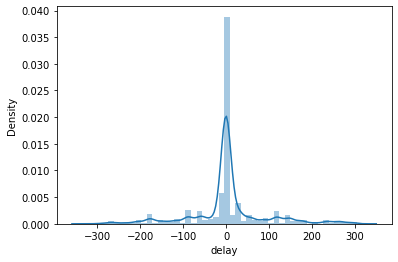

In [232]:
# distribution of the target column 
# bell curve distribution
sns.distplot(y_train)

In [233]:
X_train = X_train.merge(y_train,on = X_train.index)

In [234]:
X_train

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,12440,U001,200759878,SA corp,2019-01-15,2019,1928532279,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,14380.16,2018-12-30,NAH4,0,1
1,1779,U001,200706844,WINC corp,2019-01-15,2019,1928543114,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1,2958.38,2018-12-30,NAA8,0,1
2,1506,U001,200762301,C&S WH corporation,2019-01-15,2019,1928540104,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,338.04,2018-12-30,NAC6,0,1
3,49440,U001,200707822,PUBLI co,2019-01-14,2019,1928543073,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1,75626.47,2018-12-30,NAA8,0,0
4,26159,U001,200769623,WAL-MAR co,2019-09-01,2019,1928536831,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,71113.85,2018-12-30,NAH4,0,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,47352,U001,100046048,Other,2019-07-24,2019,1929585526,2019-10-07,2019-07-07,2019-07-10,2019-07-25,USD,RV,1,8648.85,2019-07-10,NAA8,0,-1
27380,28480,U001,200759878,SA co,2019-08-15,2019,1929588409,2019-10-07,2019-07-08,2019-07-10,2019-08-24,USD,RV,1,106556.87,2019-07-10,NAWP,0,-9
27381,44768,U001,200790543,H SC llc,2019-07-25,2019,1929594352,2019-10-07,2019-07-09,2019-07-10,2019-07-25,USD,RV,1,45304.57,2019-07-10,NAA8,0,0
27382,46717,U001,200759878,SA llc,2019-07-25,2019,1929601641,2019-10-07,2019-07-09,2019-07-10,2019-07-25,USD,RV,1,78039.59,2019-07-10,NAH4,0,0


In [235]:
X_train.describe()
#not much difference between max and 75% for 'delay'

,key_0,buisness_year,posting_id,total_open_amount,isOpen,delay
count,27384.000000,27384.0,27384.0,27384.000000,27384.0,27384.000000
mean,24778.291082,2019.0,1.0,31812.766000,0.0,4.397166
std,14462.116399,0.0,0.0,39801.282311,0.0,85.539762
min,0.000000,2019.0,1.0,4.290000,0.0,-326.000000
25%,12214.500000,2019.0,1.0,4566.210000,0.0,-5.000000
50%,24692.000000,2019.0,1.0,17051.565000,0.0,0.000000
75%,37302.250000,2019.0,1.0,45936.012500,0.0,7.000000
max,49999.000000,2019.0,1.0,792010.970000,0.0,317.000000


In [236]:
# sns.pairplot(X_train)
X_train.dtypes,X_val.dtypes

(key_0                              int64
 business_code                     object
 cust_number                       object
 name_customer                     object
 clear_date                datetime64[ns]
 buisness_year                      int32
 doc_id                            object
 posting_date              datetime64[ns]
 document_create_date      datetime64[ns]
 document_create_date.1    datetime64[ns]
 due_in_date               datetime64[ns]
 invoice_currency                  object
 document type                     object
 posting_id                         int32
 total_open_amount                float64
 baseline_create_date      datetime64[ns]
 cust_payment_terms                object
 isOpen                             int32
 delay                              int64
 dtype: object,
 business_code                     object
 cust_number                       object
 name_customer                     object
 clear_date                datetime64[ns]
 buisness_year    

In [237]:
# X_train.merge(y_train ).groupby('name_customer')['delay'].mean()

In [238]:
#coverting date time to int(mins) so that we can get the correlational matrix 
X_train['clear_date_secs'] = X_train['clear_date'].apply(lambda x: x.value)
X_train['document_create_date.1_secs'] =X_train['document_create_date.1'].apply(lambda x: x.value)
X_train['due_in_date_secs'] = X_train['due_in_date'].apply(lambda x: x.value)
X_train['posting_date_secs'] = X_train['posting_date'].apply(lambda x: x.value)
X_train['document_create_date_secs']=X_train['document_create_date'].apply(lambda x: x.value)
X_train['baseline_create_date_secs']=X_train.baseline_create_date.apply(lambda x: x.value)




In [239]:
X_train.head(1)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,baseline_create_date,cust_payment_terms,isOpen,delay,clear_date_secs,document_create_date.1_secs,due_in_date_secs,posting_date_secs,document_create_date_secs,baseline_create_date_secs
0,12440,U001,200759878,SA corp,2019-01-15,2019,1928532279,2018-12-30,2018-12-29,2018-12-30,...,2018-12-30,NAH4,0,1,1547510400000000000,1546128000000000000,1547424000000000000,1546128000000000000,1546041600000000000,1546128000000000000


<AxesSubplot:>

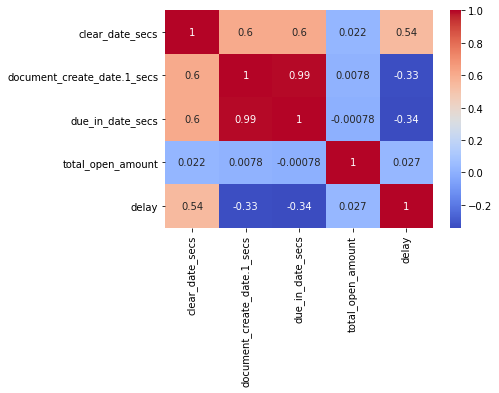

In [240]:
# Pearson correlation heatmap
num_vars = ["clear_date_secs", "document_create_date.1_secs","due_in_date_secs","total_open_amount","delay"]
sns.heatmap(X_train[num_vars].corr(),cmap="coolwarm", annot=True)
# plt.figure(figsize=(14,12))
# sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap=colormap, linecolor='white', annot=True)
#correlational between 'clear_date_secs' is better than all with 'delay'

In [241]:
#Mapping the selected features to our val and test set
X_val['clear_date_secs'] = X_val['clear_date'].apply(lambda x: x.value)
X_test['clear_date_secs'] = X_test['clear_date'].apply(lambda x: x.value)

X_val['document_create_date.1_secs'] = X_val['document_create_date.1'].apply(lambda x: x.value)
X_test['document_create_date.1_secs'] = X_test['document_create_date.1'].apply(lambda x: x.value)

X_val['due_in_date_secs'] = X_val['due_in_date'].apply(lambda x: x.value)
X_test['due_in_date_secs'] = X_test['due_in_date'].apply(lambda x: x.value)

X_val['posting_date_secs'] = X_val['posting_date'].apply(lambda x: x.value)
X_test['posting_date_secs'] = X_test['posting_date'].apply(lambda x: x.value)

X_val['document_create_date_secs'] = X_val['document_create_date'].apply(lambda x: x.value)
X_test['document_create_date_secs'] = X_test['document_create_date'].apply(lambda x: x.value)

X_val['baseline_create_date_secs'] = X_val['baseline_create_date'].apply(lambda x: x.value)
X_test['baseline_create_date_secs'] = X_test['baseline_create_date'].apply(lambda x: x.value)
# #dropping unecessary column
# X_train.drop(['document_create_date.1_secs'], axis =1,inplace=True)
# X_train.drop(['due_in_date_secs'], axis =1,inplace=True)
# X_train.drop(['posting_date_secs'], axis =1,inplace=True)
# X_train.drop(['document_create_date_secs'], axis =1,inplace=True)

# X_train.drop(['baseline_create_date_secs'], axis =1,inplace=True)

# Feature Engineering


In [242]:
X_train.nunique()

key_0                          27384
business_code                      6
cust_number                      913
name_customer                   2128
clear_date                       291
buisness_year                      1
doc_id                         27384
posting_date                     282
document_create_date             319
document_create_date.1           283
due_in_date                      371
invoice_currency                   2
document type                      2
posting_id                         1
total_open_amount              25047
baseline_create_date             322
cust_payment_terms                66
isOpen                             1
delay                            543
clear_date_secs                  291
document_create_date.1_secs      283
due_in_date_secs                 371
posting_date_secs                282
document_create_date_secs        319
baseline_create_date_secs        322
dtype: int64

In [243]:
#label encoding of 'name_customer'
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X_train['name_customer_enc']= lb.fit_transform(X_train['name_customer'])
X_val['name_customer_enc']= lb.fit_transform(X_val['name_customer'])
X_test['name_customer_enc']= lb.fit_transform(X_test['name_customer'])

In [244]:
X_train[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
0,1600,SA corp
1,2105,WINC corp
2,324,C&S WH corporation
3,1482,PUBLI co
4,2056,WAL-MAR co
...,...,...
27379,1375,Other
27380,1599,SA co
27381,802,H SC llc
27382,1604,SA llc


In [245]:
X_train.shape

(27384, 26)

In [246]:
X_train.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,cust_payment_terms,isOpen,delay,clear_date_secs,document_create_date.1_secs,due_in_date_secs,posting_date_secs,document_create_date_secs,baseline_create_date_secs,name_customer_enc
0,12440,U001,200759878,SA corp,2019-01-15,2019,1928532279,2018-12-30,2018-12-29,2018-12-30,...,NAH4,0,1,1547510400000000000,1546128000000000000,1547424000000000000,1546128000000000000,1546041600000000000,1546128000000000000,1600
1,1779,U001,200706844,WINC corp,2019-01-15,2019,1928543114,2018-12-30,2018-12-30,2018-12-30,...,NAA8,0,1,1547510400000000000,1546128000000000000,1547424000000000000,1546128000000000000,1546128000000000000,1546128000000000000,2105
2,1506,U001,200762301,C&S WH corporation,2019-01-15,2019,1928540104,2018-12-30,2018-12-29,2018-12-30,...,NAC6,0,1,1547510400000000000,1546128000000000000,1547424000000000000,1546128000000000000,1546041600000000000,1546128000000000000,324
3,49440,U001,200707822,PUBLI co,2019-01-14,2019,1928543073,2018-12-30,2018-12-30,2018-12-30,...,NAA8,0,0,1547424000000000000,1546128000000000000,1547424000000000000,1546128000000000000,1546128000000000000,1546128000000000000,1482
4,26159,U001,200769623,WAL-MAR co,2019-09-01,2019,1928536831,2018-12-30,2018-12-29,2018-12-30,...,NAH4,0,230,1567296000000000000,1546128000000000000,1547424000000000000,1546128000000000000,1546041600000000000,1546128000000000000,2056


In [247]:
#dropping 'name_customer'
X_train.drop(['name_customer'], axis =1,inplace=True)
X_val.drop(['name_customer'],axis=1 , inplace=True)
X_test.drop(['name_customer'],axis=1 , inplace=True)

In [248]:
X_train.nunique(),X_train.dtypes

(key_0                          27384
 business_code                      6
 cust_number                      913
 clear_date                       291
 buisness_year                      1
 doc_id                         27384
 posting_date                     282
 document_create_date             319
 document_create_date.1           283
 due_in_date                      371
 invoice_currency                   2
 document type                      2
 posting_id                         1
 total_open_amount              25047
 baseline_create_date             322
 cust_payment_terms                66
 isOpen                             1
 delay                            543
 clear_date_secs                  291
 document_create_date.1_secs      283
 due_in_date_secs                 371
 posting_date_secs                282
 document_create_date_secs        319
 baseline_create_date_secs        322
 name_customer_enc               2128
 dtype: int64,
 key_0                             

In [249]:
# encoding business_code,document type
X_train['business_code_enc']= lb.fit_transform(X_train['business_code'])
X_val['business_code_enc']= lb.fit_transform(X_val['business_code'])
X_test['business_code_enc']= lb.fit_transform(X_test['business_code'])
X
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

X_train['invoice_currency_enc']= lb.fit_transform(X_train['invoice_currency'])
X_val['invoice_currency_enc']= lb.fit_transform(X_val['invoice_currency'])
X_test['invoice_currency_enc']= lb.fit_transform(X_test['invoice_currency'])
X
X_train.drop(['invoice_currency'], axis =1,inplace=True)
X_val.drop(['invoice_currency'],axis=1 , inplace=True)
X_test.drop(['invoice_currency'],axis=1 , inplace=True)

X_train['document type_enc']= lb.fit_transform(X_train['document type'])
X_val['document type_enc']= lb.fit_transform(X_val['document type'])
X_test['document type_enc']= lb.fit_transform(X_test['document type'])
X
X_train.drop(['document type'], axis =1,inplace=True)
X_val.drop(['document type'],axis=1 , inplace=True)
X_test.drop(['document type'],axis=1 , inplace=True)

In [250]:
# encoding cust_payment_terms
X_train['cust_payment_terms_enc']= lb.fit_transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']= lb.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']= lb.fit_transform(X_test['cust_payment_terms'])
X
X_train.drop(['cust_payment_terms'], axis =1,inplace=True)
X_val.drop(['cust_payment_terms'],axis=1 , inplace=True)
X_test.drop(['cust_payment_terms'],axis=1 , inplace=True)

In [251]:
#binning the total_open_amount
X_train['total_open_amount_enc'] = pd.cut(x=X_train['total_open_amount'], bins=[0,20000,40000,60000,80000,100000,800000],labels=[1,2,3,4,5,6])
X_val['total_open_amount_enc'] = pd.cut(x=X_val['total_open_amount'], bins=[0,20000,40000,60000,80000,100000,800000],labels=[1,2,3,4,5,6])
X_test['total_open_amount_enc'] = pd.cut(x=X_test['total_open_amount'], bins=[0,20000,40000,60000,80000,100000,800000],labels=[1,2,3,4,5,6])

******* clear_date_secs *******


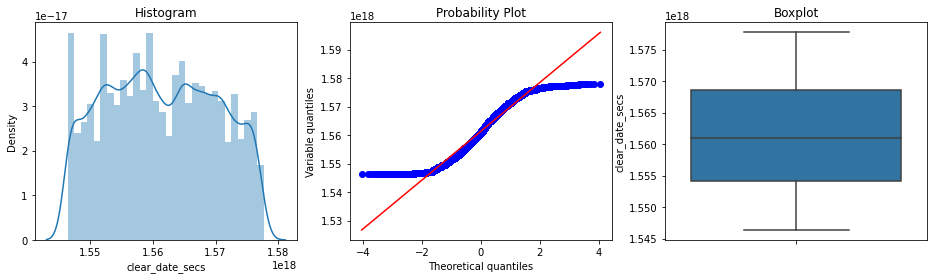

In [252]:
# function to create histogram, Q-Q plot and boxplot
 
# for Q-Q plots
import scipy.stats as stats
 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()
 
num_var = ["clear_date_secs"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(X_train, var)
#cant remove outliers in 'delay' as it will lead to biasing

In [253]:
X_train.drop('key_0',axis=1,inplace=True)

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

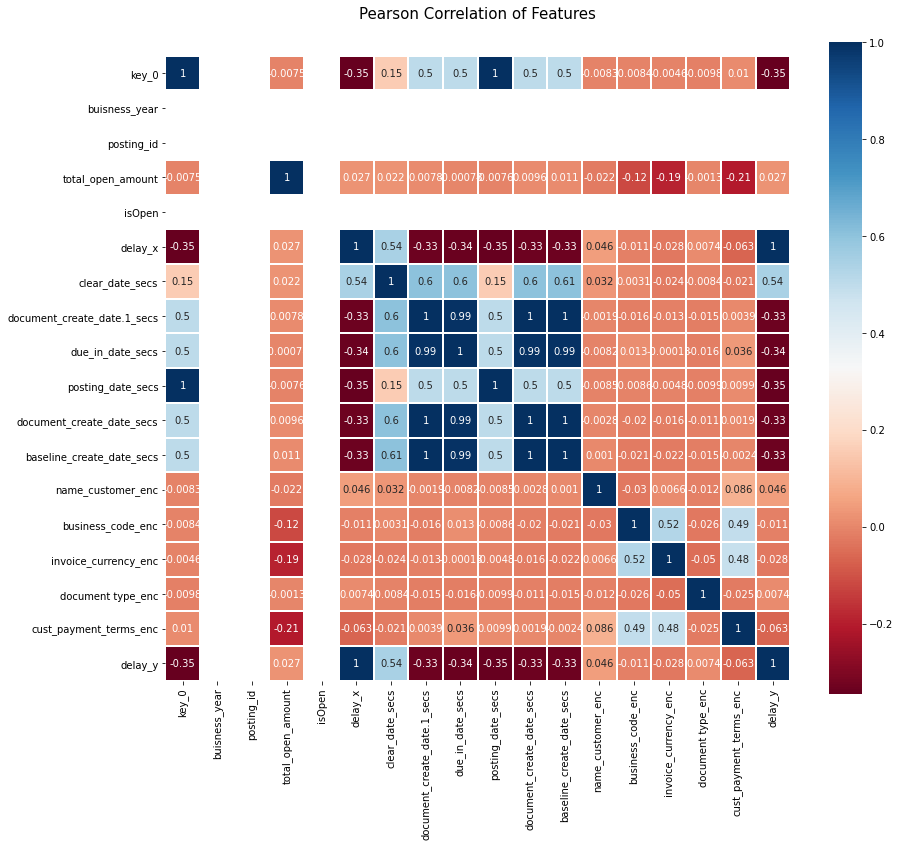

In [254]:
# Pearson correlation heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [255]:
#as we can see 'buisness_year','isOpen' and 'posting_id' are constant - so dropping them
X_train.drop('buisness_year',axis=1,inplace=True)
X_val.drop('buisness_year',axis=1,inplace=True)
X_test.drop('buisness_year',axis=1,inplace=True)

X_train.drop('isOpen',axis=1,inplace=True)
X_val.drop('isOpen',axis=1,inplace=True)
X_test.drop('isOpen',axis=1,inplace=True)

X_train.drop('posting_id',axis=1,inplace=True)
X_val.drop('posting_id',axis=1,inplace=True)
X_test.drop('posting_id',axis=1,inplace=True)

In [256]:
X_train.dtypes

cust_number                            object
clear_date                     datetime64[ns]
doc_id                                 object
posting_date                   datetime64[ns]
document_create_date           datetime64[ns]
document_create_date.1         datetime64[ns]
due_in_date                    datetime64[ns]
total_open_amount                     float64
baseline_create_date           datetime64[ns]
delay                                   int64
clear_date_secs                         int64
document_create_date.1_secs             int64
due_in_date_secs                        int64
posting_date_secs                       int64
document_create_date_secs               int64
baseline_create_date_secs               int64
name_customer_enc                       int32
business_code_enc                       int32
invoice_currency_enc                    int32
document type_enc                       int32
cust_payment_terms_enc                  int32
total_open_amount_enc             

In [257]:
#droping date time type as they have already been converted to secs(int)
X_train.drop('clear_date',axis=1,inplace=True)
X_val.drop('clear_date',axis=1,inplace=True)
X_test.drop('clear_date',axis=1,inplace=True)

X_train.drop('posting_date',axis=1,inplace=True)
X_val.drop('posting_date',axis=1,inplace=True)
X_test.drop('posting_date',axis=1,inplace=True)

X_train.drop('document_create_date',axis=1,inplace=True)
X_val.drop('document_create_date',axis=1,inplace=True)
X_test.drop('document_create_date',axis=1,inplace=True)

X_train.drop('document_create_date.1',axis=1,inplace=True)
X_val.drop('document_create_date.1',axis=1,inplace=True)
X_test.drop('document_create_date.1',axis=1,inplace=True)

X_train.drop('due_in_date',axis=1,inplace=True)
X_val.drop('due_in_date',axis=1,inplace=True)
X_test.drop('due_in_date',axis=1,inplace=True)

X_train.drop('baseline_create_date',axis=1,inplace=True)
X_val.drop('baseline_create_date',axis=1,inplace=True)
X_test.drop('baseline_create_date',axis=1,inplace=True)

X_train.drop('total_open_amount',axis=1,inplace=True)
X_val.drop('total_open_amount',axis=1,inplace=True)
X_test.drop('total_open_amount',axis=1,inplace=True)



In [258]:
X_train.nunique(), X_train.shape

(cust_number                      913
 doc_id                         27384
 delay                            543
 clear_date_secs                  291
 document_create_date.1_secs      283
 due_in_date_secs                 371
 posting_date_secs                282
 document_create_date_secs        319
 baseline_create_date_secs        322
 name_customer_enc               2128
 business_code_enc                  6
 invoice_currency_enc               2
 document type_enc                  2
 cust_payment_terms_enc            66
 total_open_amount_enc              6
 dtype: int64,
 (27384, 15))

In [259]:
#as dropping doc_id as it acts as an primary key
X_train.drop('doc_id',axis=1,inplace=True)
X_val.drop('doc_id',axis=1,inplace=True)
X_test.drop('doc_id',axis=1,inplace=True)

X_train.drop('cust_number',axis=1,inplace=True)
X_val.drop('cust_number',axis=1,inplace=True)
X_test.drop('cust_number',axis=1,inplace=True)

In [260]:
X_train.dtypes

delay                             int64
clear_date_secs                   int64
document_create_date.1_secs       int64
due_in_date_secs                  int64
posting_date_secs                 int64
document_create_date_secs         int64
baseline_create_date_secs         int64
name_customer_enc                 int32
business_code_enc                 int32
invoice_currency_enc              int32
document type_enc                 int32
cust_payment_terms_enc            int32
total_open_amount_enc          category
dtype: object

In [261]:
#applying variance threeshold to remove quasi-constant feature
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [262]:
sel.variances_

array([7.31678368e+03, 7.60431512e+31, 5.99616646e+31, 6.05326400e+31,
       4.78940982e+31, 5.99901358e+31, 6.00526921e+31, 4.84986107e+05,
       3.03010173e-01, 7.36392616e-02, 2.19058040e-04, 1.32387682e+02,
       2.32012466e+00])

In [263]:
X_train.dtypes

delay                             int64
clear_date_secs                   int64
document_create_date.1_secs       int64
due_in_date_secs                  int64
posting_date_secs                 int64
document_create_date_secs         int64
baseline_create_date_secs         int64
name_customer_enc                 int32
business_code_enc                 int32
invoice_currency_enc              int32
document type_enc                 int32
cust_payment_terms_enc            int32
total_open_amount_enc          category
dtype: object

In [264]:
# X_train.drop('document_create_date.1_secs',axis=1,inplace=True)
# X_train.drop('due_in_date_secs',axis=1,inplace=True)
# X_train.drop('posting_date_secs',axis=1,inplace=True)
# X_train.drop('document_create_date_secs',axis=1,inplace=True)
# X_train.drop('baseline_create_date_secs',axis=1,inplace=True)
# X_train.drop('name_customer_enc',axis=1,inplace=True)
# X_train.drop('business_code_enc',axis=1,inplace=True)
# X_train.drop('invoice_currency_enc',axis=1,inplace=True)
# X_train.drop('document type_enc',axis=1,inplace=True)
# X_train.drop('cust_payment_terms_enc',axis=1,inplace=True)
# X_train.drop('total_open_amount_enc',axis=1,inplace=True)

# X_test.drop('document_create_date.1_secs',axis=1,inplace=True)
# X_test.drop('due_in_date_secs',axis=1,inplace=True)
# X_test.drop('posting_date_secs',axis=1,inplace=True)
# X_test.drop('document_create_date_secs',axis=1,inplace=True)
# X_test.drop('baseline_create_date_secs',axis=1,inplace=True)
# X_test.drop('name_customer_enc',axis=1,inplace=True)
# X_test.drop('business_code_enc',axis=1,inplace=True)
# X_test.drop('invoice_currency_enc',axis=1,inplace=True)
# X_test.drop('document type_enc',axis=1,inplace=True)
# X_test.drop('cust_payment_terms_enc',axis=1,inplace=True)
# X_test.drop('total_open_amount_enc',axis=1,inplace=True)

# X_val.drop('document_create_date.1_secs',axis=1,inplace=True)
# X_val.drop('due_in_date_secs',axis=1,inplace=True)
# X_val.drop('posting_date_secs',axis=1,inplace=True)
# X_val.drop('document_create_date_secs',axis=1,inplace=True)
# X_val.drop('baseline_create_date_secs',axis=1,inplace=True)
# X_val.drop('name_customer_enc',axis=1,inplace=True)
# X_val.drop('business_code_enc',axis=1,inplace=True)
# X_val.drop('invoice_currency_enc',axis=1,inplace=True)
# X_val.drop('document type_enc',axis=1,inplace=True)
# X_val.drop('cust_payment_terms_enc',axis=1,inplace=True)
# X_val.drop('total_open_amount_enc',axis=1,inplace=True)



# Feature Scaling

In [265]:
#Doing Data normalization-Scaling features to a range using standaradization as our data follows normal distribution(bell curve)
#it is performed on independent variables therefore seperating them first
y_train = X_train['delay'] #dependent or target variable
X_train = X_train.drop('delay',axis=1) #independent variables



In [266]:
# #Scaling features to a range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_val = sc.transform(X_val)

In [267]:
# X_train['clear_date_secs'] = pd.to_datetime(X_train['clear_date_secs']).astype(str)
# X_test['clear_date_secs'] = pd.to_datetime(X_test['clear_date_secs']).astype(str)
# X_val['clear_date_secs'] = pd.to_datetime(X_val['clear_date_secs']).astype(str)

In [268]:
# X_test.dtypes

In [269]:
# X_train['clear_date_secs'] = X_train['clear_date_secs'].str.replace('-','').astype(int)
# X_test['clear_date_secs'] = X_test['clear_date_secs'].str.replace('-','').astype(int)
# X_val['clear_date_secs'] = X_val['clear_date_secs'].str.replace('-','').astype(int)

# Creating Model

## We are doing supervised Learning (using labelled data)
## PDP comes under regression problem as we are predicting in the form of continous value.
## So we will be using Regression solving algorithms

### Linear Regression

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [271]:
#to calculate root mean square error
def rmse(y_val, y_pred):
  return np.sqrt(mean_squared_error(y_val, y_pred))

In [272]:


lr_rmse = rmse(y_val, lr.predict(X_val))
lr_rmse

2.0860160588855016e-12

### Support Vector Machine

In [273]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

svr_rmse = rmse(y_val, svr.predict(X_val))
svr_rmse

41.33055649848838

### RandomForestRegressor

In [274]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_val,y_val)
rfr_rmse = rmse(y_val, svr.predict(X_val))
rfr_rmse

41.33055649848838

### XGBoost

In [275]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_val,y_val)
xgb_reg_rmse = rmse(y_val, svr.predict(X_val))
xgb_reg_rmse

41.33055649848838

## Linear Regression is giving us the best result so we will be using it

## Predicting on our test case now

In [276]:
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_rmse

1.755930035171845e+19

# Working on our Main test case now

In [277]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,200705742,DOT trust,NaN,2020,1930704656,26-03-2020,20200326,20200326,20200427,USD,RV,1,NaN,33027.15,20200326,NA32,1930704656.0,1
4,U001,200772670,ASSOCIAT foundation,NaN,2020,1930777845,11-04-2020,20200411,20200411,20200426,USD,RV,1,NaN,18351.01,20200411,NAU5,1930777845.0,1
12,U001,200769623,WAL-MAR us,NaN,2020,1930584631,02-03-2020,20200229,20200302,20200317,USD,RV,1,NaN,2346.64,20200302,NAH4,1930584631.0,1
19,CA02,140106408,WAL-M systems,NaN,2020,2960620808,13-03-2020,20200313,20200313,20200323,CAD,RV,1,NaN,50646.08,20200313,CA10,2960620808.0,1
22,U001,200704045,RA co,NaN,2020,1930649375,13-03-2020,20200313,20200313,20200328,USD,RV,1,NaN,12414.28,20200313,NAA8,1930649375.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49969,U001,200729942,SA,NaN,2020,1930801606,21-04-2020,20200418,20200421,20200506,USD,RV,1,NaN,16360.32,20200421,NAA8,1930801606.0,1
49971,U001,200769623,WAL-MAR us,NaN,2020,1930719820,31-03-2020,20200330,20200331,20200415,USD,RV,1,NaN,23717.71,20200331,NAH4,1930719820.0,1
49973,U001,200706844,WINC,NaN,2020,1930781921,14-04-2020,20200413,20200414,20200429,USD,RV,1,NaN,54540.58,20200414,NAA8,1930781921.0,1
49995,U001,200799342,MITCH associates,NaN,2020,1930785537,14-04-2020,20200414,20200414,20200429,USD,RV,1,NaN,45738.17,20200414,NAA8,1930785537.0,1


## Doing all the Data Preprocessing

In [278]:
test.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9710
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
area_business             9710
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [279]:
test.drop(['area_business'], axis = 1,inplace=True)
test.shape

(9710, 18)

In [280]:
test.drop(['invoice_id'], axis = 1,inplace=True)
test.shape

(9710, 17)

In [281]:
# main_train.clear_date = pd.to_datetime(main_train['clear_date'])
test['document_create_date.1'] = pd.to_datetime(test['document_create_date.1'],format='%Y%m%d')
test.due_in_date = pd.to_datetime(test['due_in_date'],format='%Y%m%d')
test['posting_date'] = pd.to_datetime(test['posting_date'])

test['document_create_date']=pd.to_datetime(test['document_create_date'], format='%Y%m%d')

test['due_in_date']=pd.to_datetime(test.due_in_date,format='%Y%m%d')
test['baseline_create_date']=pd.to_datetime(test.baseline_create_date,format='%Y%m%d')

test.clear_date = pd.to_datetime(test['clear_date'])

In [282]:
test['clear_date_secs'] = test['clear_date'].apply(lambda x: x.value)
# test.drop('clear_date',axis=1,inplace=True)

In [283]:
test['buisness_year'] = test['buisness_year'].astype(int)
# main_train['doc_id'] = main_train['doc_id'].astype(int)
test['posting_id'] = test['posting_id'].astype(int)
test['total_open_amount'] = test['total_open_amount'].astype(float)
test['isOpen'] = test['isOpen'].astype(int)

In [284]:
s = pd.Series(test['name_customer'].value_counts(),name='vals')
s =s.to_frame()
l = list(s[s.vals==1].index.values)
test['name_customer'] = np.where(test['name_customer'].isin(l),"Other",test['name_customer'])

In [285]:

test['document_create_date.1_secs'] =test['document_create_date.1'].apply(lambda x: x.value)
test['due_in_date_secs'] = test['due_in_date'].apply(lambda x: x.value)
test['posting_date_secs'] = test['posting_date'].apply(lambda x: x.value)
test['document_create_date_secs']=test['document_create_date'].apply(lambda x: x.value)
test['baseline_create_date_secs']=test.baseline_create_date.apply(lambda x: x.value)

In [286]:

test['document_create_date.1_secs'] =test['document_create_date.1'].apply(lambda x: x.value)
test['due_in_date_secs'] = test['due_in_date'].apply(lambda x: x.value)
test['posting_date_secs'] = test['posting_date'].apply(lambda x: x.value)
test['document_create_date_secs']=test['document_create_date'].apply(lambda x: x.value)
test['baseline_create_date_secs']=test.baseline_create_date.apply(lambda x: x.value)

In [287]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
test['name_customer_enc']= lb.fit_transform(test['name_customer'])


#dropping 'name_customer'
test.drop(['name_customer'], axis =1,inplace=True)


# encoding business_code,document type
test['business_code_enc']= lb.fit_transform(test['business_code'])

test.drop(['business_code'], axis =1,inplace=True)


test['invoice_currency_enc']= lb.fit_transform(test['invoice_currency'])

test.drop(['invoice_currency'], axis =1,inplace=True)

test['document type_enc']= lb.fit_transform(test['document type'])

test.drop(['document type'], axis =1,inplace=True)


# encoding cust_payment_terms
test['cust_payment_terms_enc']= lb.fit_transform(test['cust_payment_terms'])

test.drop(['cust_payment_terms'], axis =1,inplace=True)


test['total_open_amount_enc'] = pd.cut(x=test['total_open_amount'], bins=[0,20000,40000,60000,80000,100000,800000],labels=[1,2,3,4,5,6])


#as we can see 'buisness_year','isOpen' and 'posting_id' are constant - so dropping them
test.drop('buisness_year',axis=1,inplace=True)

test.drop('isOpen',axis=1,inplace=True)


test.drop('posting_id',axis=1,inplace=True)


#droping date time type as they have already been converted to secs(int)
test.drop('clear_date',axis=1,inplace=True)


test.drop('posting_date',axis=1,inplace=True)


test.drop('document_create_date',axis=1,inplace=True)


test.drop('document_create_date.1',axis=1,inplace=True)

test.drop('due_in_date',axis=1,inplace=True)


test.drop('baseline_create_date',axis=1,inplace=True)



test.drop('total_open_amount',axis=1,inplace=True)


#as dropping doc_id as it acts as an primary key
test.drop('doc_id',axis=1,inplace=True)


test.drop('cust_number',axis=1,inplace=True)


In [288]:
test.columns, X_test.columns

(Index(['clear_date_secs', 'document_create_date.1_secs', 'due_in_date_secs',
        'posting_date_secs', 'document_create_date_secs',
        'baseline_create_date_secs', 'name_customer_enc', 'business_code_enc',
        'invoice_currency_enc', 'document type_enc', 'cust_payment_terms_enc',
        'total_open_amount_enc'],
       dtype='object'),
 Index(['clear_date_secs', 'document_create_date.1_secs', 'due_in_date_secs',
        'posting_date_secs', 'document_create_date_secs',
        'baseline_create_date_secs', 'name_customer_enc', 'business_code_enc',
        'invoice_currency_enc', 'document type_enc', 'cust_payment_terms_enc',
        'total_open_amount_enc'],
       dtype='object'))

In [289]:

final_result = lr.predict(test)


In [290]:

final_result = pd.Series(final_result,name='delay')
test.reset_index(drop=True,inplace=True)

In [291]:
Final = test.merge(final_result , on = test.index )
Final

,key_0,clear_date_secs,document_create_date.1_secs,due_in_date_secs,posting_date_secs,document_create_date_secs,baseline_create_date_secs,name_customer_enc,business_code_enc,invoice_currency_enc,document type_enc,cust_payment_terms_enc,total_open_amount_enc,delay
0,0,-9223372036854775808,1585180800000000000,1587945600000000000,1585180800000000000,1585180800000000000,1585180800000000000,270,1,1,0,8,2,-1.073900e+21
1,1,-9223372036854775808,1586563200000000000,1587859200000000000,1604448000000000000,1586563200000000000,1586563200000000000,61,1,1,0,32,1,-1.073892e+21
2,2,-9223372036854775808,1583107200000000000,1584403200000000000,1580688000000000000,1582934400000000000,1583107200000000000,882,1,1,0,27,1,-1.073581e+21
3,3,-9223372036854775808,1584057600000000000,1584921600000000000,1584057600000000000,1584057600000000000,1584057600000000000,869,0,0,0,2,3,-1.073628e+21
4,4,-9223372036854775808,1584057600000000000,1585353600000000000,1584057600000000000,1584057600000000000,1584057600000000000,603,1,1,0,13,1,-1.073667e+21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,9705,-9223372036854775808,1587427200000000000,1588723200000000000,1587427200000000000,1587168000000000000,1587427200000000000,637,1,1,0,13,1,-1.073970e+21
9706,9706,-9223372036854775808,1585612800000000000,1586908800000000000,1585612800000000000,1585526400000000000,1585612800000000000,882,1,1,0,27,2,-1.073807e+21
9707,9707,-9223372036854775808,1586822400000000000,1588118400000000000,1586822400000000000,1586736000000000000,1586822400000000000,904,1,1,0,13,3,-1.073916e+21
9708,9708,-9223372036854775808,1586822400000000000,1588118400000000000,1586822400000000000,1586822400000000000,1586822400000000000,528,1,1,0,13,3,-1.073916e+21


In [292]:
Final.nunique()

key_0                          9710
clear_date_secs                   1
document_create_date.1_secs      84
due_in_date_secs                121
posting_date_secs                84
document_create_date_secs        90
baseline_create_date_secs        83
name_customer_enc               916
business_code_enc                 5
invoice_currency_enc              2
document type_enc                 1
cust_payment_terms_enc           43
total_open_amount_enc             6
delay                           121
dtype: int64

In [293]:
Final.loc[Final['delay']>45, 'bucket_ageing'] ='45<'
Final.loc[Final['delay']<=45, 'bucket_ageing'] ='31-45'
Final.loc[Final['delay']<=30, 'bucket_ageing'] ='16-30'
Final.loc[Final['delay']<=15, 'bucket_ageing'] ='0-15'
Final.loc[Final['delay']<=0, 'bucket_ageing'] ='<0'

In [294]:
Final

,key_0,clear_date_secs,document_create_date.1_secs,due_in_date_secs,posting_date_secs,document_create_date_secs,baseline_create_date_secs,name_customer_enc,business_code_enc,invoice_currency_enc,document type_enc,cust_payment_terms_enc,total_open_amount_enc,delay,bucket_ageing
0,0,-9223372036854775808,1585180800000000000,1587945600000000000,1585180800000000000,1585180800000000000,1585180800000000000,270,1,1,0,8,2,-1.073900e+21,<0
1,1,-9223372036854775808,1586563200000000000,1587859200000000000,1604448000000000000,1586563200000000000,1586563200000000000,61,1,1,0,32,1,-1.073892e+21,<0
2,2,-9223372036854775808,1583107200000000000,1584403200000000000,1580688000000000000,1582934400000000000,1583107200000000000,882,1,1,0,27,1,-1.073581e+21,<0
3,3,-9223372036854775808,1584057600000000000,1584921600000000000,1584057600000000000,1584057600000000000,1584057600000000000,869,0,0,0,2,3,-1.073628e+21,<0
4,4,-9223372036854775808,1584057600000000000,1585353600000000000,1584057600000000000,1584057600000000000,1584057600000000000,603,1,1,0,13,1,-1.073667e+21,<0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,9705,-9223372036854775808,1587427200000000000,1588723200000000000,1587427200000000000,1587168000000000000,1587427200000000000,637,1,1,0,13,1,-1.073970e+21,<0
9706,9706,-9223372036854775808,1585612800000000000,1586908800000000000,1585612800000000000,1585526400000000000,1585612800000000000,882,1,1,0,27,2,-1.073807e+21,<0
9707,9707,-9223372036854775808,1586822400000000000,1588118400000000000,1586822400000000000,1586736000000000000,1586822400000000000,904,1,1,0,13,3,-1.073916e+21,<0
9708,9708,-9223372036854775808,1586822400000000000,1588118400000000000,1586822400000000000,1586822400000000000,1586822400000000000,528,1,1,0,13,3,-1.073916e+21,<0
